Use this code directly in Google colab

### CNN is scaling or rotation invariant

This method avoids overfitting of model and will increase accuracy.

To handle this problem, we can use data augmentation. From your existing training samples you try to generate new samples.

We can do several operation on the existing dataset like:
1. Horizontal Flip
2. Contrast
3. Rotation
4. Zoom

### Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL # image library
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
# # for temporary usage of dataset
# from google.colab import files
# uploaded = files.upload()

### Connecting to google drive

In [4]:
# for permenant usage of dataset, save in google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data extraction

In [5]:
import tarfile

drive_path = '/content/drive/MyDrive/datasets/flower_photos.tgz'

with tarfile.open(drive_path, 'r:gz') as tar:
    tar.extractall('/content/flower_photos')


In [6]:
# directory of my flower_photos data
data_dir = "/content/flower_photos/flower_photos"

# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir,
#     validation_split=0.2,
#     subset="training",
#     seed=123,
#     image_size=(180, 180),
#     batch_size=32
# )

# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir,
#     validation_split=0.2,
#     subset="validation",
#     seed=123,
#     image_size=(180, 180),
#     batch_size=32
# )

In [7]:
# # to check whether we are pointing to the different flowers
# import os

# # This is what you should point to
# data_dir = "/content/flower_photos/flower_photos"

# # Just to double-check:
# print(os.listdir(data_dir))

In [8]:
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/flower_photos/flower_photos')

In [9]:
image_count = len(list(data_dir.glob('*/*.jpg'))) # total images
image_count

3670

In [10]:
roses = list(data_dir.glob('roses/*')) # roses images
roses[:5]

[PosixPath('/content/flower_photos/flower_photos/roses/5979193298_639e877248.jpg'),
 PosixPath('/content/flower_photos/flower_photos/roses/8747396730_966149e6fe_n.jpg'),
 PosixPath('/content/flower_photos/flower_photos/roses/13279526615_a3b0059bec.jpg'),
 PosixPath('/content/flower_photos/flower_photos/roses/9216323421_f737c1d50e.jpg'),
 PosixPath('/content/flower_photos/flower_photos/roses/509239741_28e2cfe492_m.jpg')]

### Image visualization

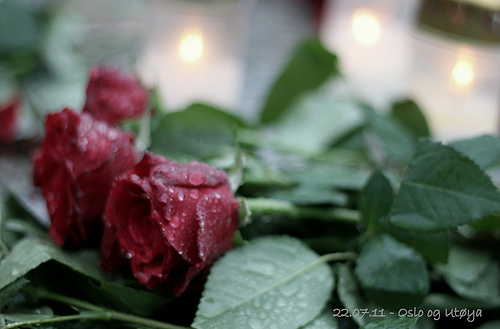

In [11]:
# 1st image of roses
PIL.Image.open(str(roses[0]))

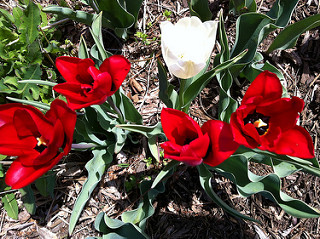

In [12]:
# 1st image of tuplips
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [13]:
# dictionary for classes identification
# all path of rose images is given a key of roses and same to others
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [14]:
# labels dictionary
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [15]:
flowers_images_dict['roses'][0] # address of the 1st rose

PosixPath('/content/flower_photos/flower_photos/roses/5979193298_639e877248.jpg')

array([[[117, 122,  95],
        [113, 118,  91],
        [111, 116,  87],
        ...,
        [177, 202, 206],
        [177, 199, 204],
        [175, 197, 202]],

       [[111, 116,  89],
        [110, 115,  86],
        [109, 114,  85],
        ...,
        [172, 198, 204],
        [173, 197, 203],
        [172, 196, 202]],

       [[108, 113,  84],
        [104, 109,  80],
        [100, 108,  78],
        ...,
        [164, 193, 200],
        [164, 192, 199],
        [163, 191, 198]],

       ...,

       [[ 77,  88,  85],
        [ 84,  97,  89],
        [ 79,  95,  84],
        ...,
        [ 63,  76,  52],
        [ 61,  74,  50],
        [ 61,  74,  50]],

       [[ 76,  86,  80],
        [ 82,  93,  83],
        [ 92, 110,  97],
        ...,
        [ 67,  80,  56],
        [ 64,  77,  53],
        [ 65,  78,  54]],

       [[ 85,  99,  88],
        [106, 124, 111],
        [113, 139, 116],
        ...,
        [ 70,  83,  59],
        [ 69,  83,  59],
        [ 68,  81,  59]]], dtype=uint8)
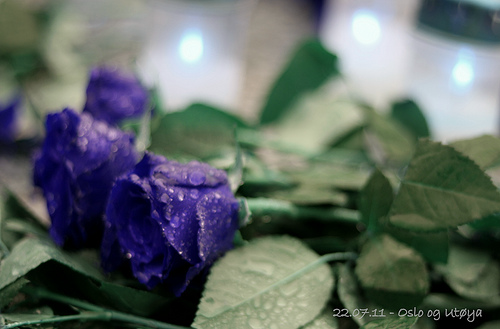

In [16]:
# we can use cv2 to read this image file as opencv object
img = cv2.imread(flowers_images_dict['roses'][0])
img # opencv converted that into 3 dimensional numpy array

In [17]:
img.shape

(329, 500, 3)

In [18]:
# every image is of different dimensions
# while training the model we have to make every image into same dimension
# reshaping
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [19]:
# x = input image, y = output class
x,y = [],[]

for flower_name, images in flowers_images_dict.items(): # this flower_name gives the name of flower and images gives the number of images in that class
  print(flower_name)
  print(len(images))

for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(image)
    resized_img = cv2.resize(img, (180,180))
    x.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [20]:
y[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

array([[[112, 117,  89],
        [105, 110,  81],
        [104, 109,  80],
        ...,
        [175, 203, 210],
        [176, 202, 208],
        [175, 198, 203]],

       [[103, 108,  79],
        [ 93, 104,  72],
        [103, 108,  78],
        ...,
        [161, 196, 204],
        [160, 192, 201],
        [161, 190, 198]],

       [[ 94, 102,  71],
        [ 89, 102,  70],
        [100, 106,  75],
        ...,
        [144, 180, 190],
        [142, 178, 188],
        [140, 177, 185]],

       ...,

       [[ 96, 119,  98],
        [119, 132, 110],
        [ 58,  74,  52],
        ...,
        [ 43,  54,  34],
        [ 46,  58,  36],
        [ 49,  61,  39]],

       [[ 89, 104,  94],
        [100, 126, 115],
        [104, 135, 123],
        ...,
        [ 58,  70,  48],
        [ 58,  71,  48],
        [ 60,  72,  49]],

       [[ 94, 109,  98],
        [ 99, 130, 116],
        [ 61, 102,  90],
        ...,
        [ 64,  78,  54],
        [ 66,  79,  54],
        [ 67,  80,  56]]], dtype=uint8)
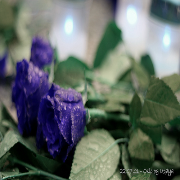

In [21]:
x[0]

In [22]:
# converting the list into np array
x = np.array(x)
y = np.array(y)

### Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### Scaling

In [24]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

CNN model

In [25]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'), # 16 filters, size 3x3
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'), # 32 filters, size 3x3
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'), # 64 filters, size 3x3
    layers.MaxPooling2D(),

    layers.Flatten(), # Dense network will accept only 1D array

    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(x_train_scaled,y_train,epochs=30)
# 99.99% accuracy in train data

Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.3602 - loss: 1.5018
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5991 - loss: 1.0143
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6845 - loss: 0.8334
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7524 - loss: 0.6610
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8491 - loss: 0.4410
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9099 - loss: 0.2817
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9684 - loss: 0.1285
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9844 - loss: 0.0678
Epoch 9/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9764 - loss: 0.0860
Epoch 10/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9907 - loss: 0.0405
Epoch 11/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9945 - loss: 0.0231
Epoch 12/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy:

In [26]:
model.evaluate(x_test_scaled,y_test) # 63.5% accuracy
# Overfitting of data

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6322 - loss: 2.7284


[2.486222982406616, 0.6416893601417542]

### Model Prediction

In [27]:
predictions = model.predict(x_test_scaled)
predictions

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


array([[ -1.0012847 ,   5.715144  ,  -8.742523  ,  -8.985969  ,
          1.2315923 ],
       [  8.461092  ,  -8.318685  , -11.494735  ,  -6.0353928 ,
         11.988636  ],
       [ -2.5803967 ,  -0.42783234,  23.256882  , -16.45827   ,
        -17.811735  ],
       ...,
       [ -1.9523355 ,   7.6139035 ,  11.953296  , -19.559706  ,
         -2.8005736 ],
       [ -9.945219  ,  -0.45255587,   5.370956  ,  -0.3925807 ,
         -4.626537  ],
       [ -4.96495   ,   1.9959192 ,  18.15872   ,  -9.501134  ,
        -17.473427  ]], dtype=float32)

In [28]:
# To convert to probability score, we'll change linear activation to softmax activation
score = tf.nn.softmax(predictions[0])
score # it contains values b/w 0 and 1

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.1959001e-03, 9.8764950e-01, 5.1965810e-07, 4.0737154e-07,
       1.1153752e-02], dtype=float32)>

In [29]:
np.argmax(score)

np.int64(1)

In [30]:
y_test[0]

np.int64(1)

### Augmentation

In [31]:
img_height,img_width = 180,180

In [32]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal',
                      input_shape=(img_height,
                                   img_width,
                                   3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### Original Image

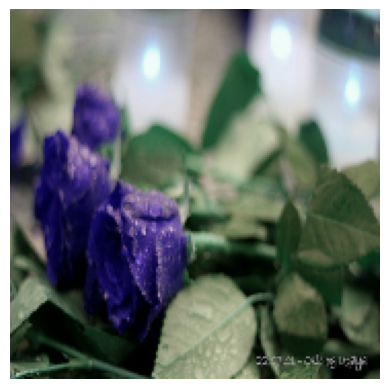

In [33]:
plt.axis('off')
plt.imshow(x[0])

In [34]:
data_augmentation(x)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[238.90128 , 252.10753 , 249.80212 ],
        [239.5748  , 252.5175  , 249.6615  ],
        [238.72174 , 251.99084 , 248.97876 ],
        ...,
        [145.44409 , 150.75739 , 124.087204],
        [137.80267 , 142.46613 , 117.12718 ],
        [128.53122 , 134.00203 , 108.8922  ]],

       [[238.97023 , 252.08363 , 249.71968 ],
        [239.97476 , 252.31546 , 249.58777 ],
        [239.32393 , 251.71303 , 249.1747  ],
        ...,
        [139.50592 , 145.87267 , 119.11243 ],
        [131.4025  , 137.01492 , 110.82629 ],
        [121.054474, 126.9978  , 101.34775 ]],

       [[239.45688 , 252.40295 , 249.84174 ],
        [239.92409 , 251.91646 , 249.37494 ],
        [238.1052  , 250.64426 , 248.86797 ],
        ...,
        [134.87671 , 141.66985 , 115.03455 ],
        [124.458305, 132.03117 , 104.68544 ],
        [112.98301 , 120.7816  ,  93.865234]],

       ...,

       [[ 15.489397,  44.68771 ,  20.145866],
        [ 17.

#### Image after Augmentation

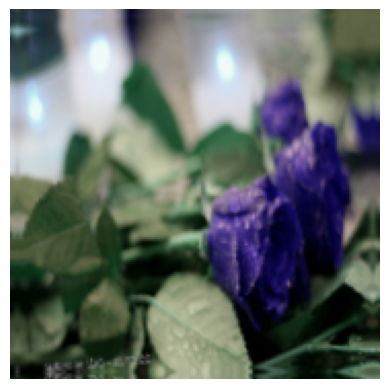

In [35]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype('uint8'))

### Model Training with data augmentation

In [36]:
num_classes = 5

model = Sequential([
    data_augmentation, # 1st layer as data augmentation
    layers.Conv2D(16,3,padding='same',activation='relu'), # 16 filters, size 3x3
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'), # 32 filters, size 3x3
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'), # 64 filters, size 3x3
    layers.MaxPooling2D(),
    layers.Dropout(0.2), # drops out randomly 20% of neurons at each pass for generalization
    layers.Flatten(), # Dense network will accept only 1D array

    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(x_train_scaled,y_train,epochs=30)
# 90.64% accuracy in train data

Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.3182 - loss: 1.5239
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5781 - loss: 1.0742
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.6358 - loss: 0.9468
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.6684 - loss: 0.8540
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6817 - loss: 0.8407
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6981 - loss: 0.7747
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7212 - loss: 0.7381
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7358 - loss: 0.6847
Epoch 9/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.7435 - loss: 0.6647
Epoch 10/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7627 - loss: 0.6336
Epoch 11/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7700 - loss: 0.6057
Epoch 12/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy:

In [37]:
model.evaluate(x_test_scaled,y_test) # 63.5% accuracy -> 74% accuracy after augmentation

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7405 - loss: 0.9148


[0.8393933773040771, 0.7574931979179382]